In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [66]:
df = pd.read_csv('ground_working2.csv')

df.head(30)





,GWSI SITE ID,WL 1998,WL 2008,WL 2017,WL 2018
0,341336111174801,9.6,4.10,4.2,7.8
1,312109110352501,7.5,6.60,5.6,5.8
2,324304111082101,13.3,6.30,6.8,10.1
3,334943109055301,5.1,16.10,7.3,7.1
4,312048110504901,11.3,13.40,8.1,12.6
5,313137111004301,11.4,14.60,9.9,10.0
6,313406111330201,11.7,16.00,10.4,9.9
7,334653111154101,11.0,11.50,13.1,11.8
8,321612110524001,30.8,22.45,14.1,32.5
9,333447111402901,10.8,12.65,14.5,13.2


In [63]:
from scipy import stats
np.random.seed(11)
'''
t, p = stats.ttest_ind(df['WL 1998'],df['WL 2018'], equal_var = False)

'''
t, p = stats.ttest_ind(df['WL 1998'],df['WL 2018'], equal_var = False)
print(t,p)

t08, p08 = stats.ttest_ind(df['WL 2008'],df['WL 2018'], equal_var = False)
print(t08,p08)

t17, p17 = stats.ttest_ind(df['WL 2017'],df['WL 2018'], equal_var = False)
print(t17,p17)

print(means)

0.46982090154970607 0.6385241872544807
0.2507148844413183 0.8020552541351146
5.776474782031954 8.60264912276473e-09
[227.6157108433733, 226.1822851405623, 264.4725702811248, 224.58831325301233]


In [44]:
acc_98 = []
acc_08 = []
acc_17 = []


for i in range(len(df)):
    if df['WL 1998'][i] < df['WL 2018'][i]:
        acc_98.append(1)
    else:
        acc_98.append(0)
    if df['WL 2008'][i] < df['WL 2018'][i]:
        acc_08.append(1)
    else:
        acc_08.append(0)
    if df['WL 2017'][i] < df['WL 2018'][i]:
        acc_17.append(1)
    else:
        acc_17.append(0)

print(np.array(acc_98).mean(), np.array(acc_08).mean(), np.array(acc_17).mean())

0.5823293172690763 0.5726907630522088 0.351004016064257


264.4725702811248


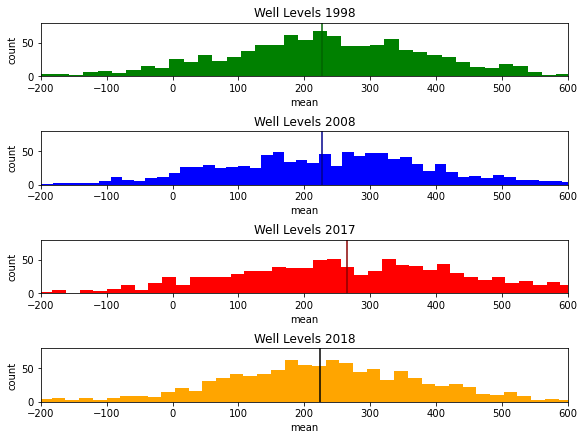

In [62]:
from scipy.stats import norm

means = []
stds = []
means.append(df['WL 1998'].mean())
means.append(df['WL 2008'].mean())
means.append(df['WL 2017'].mean())
means.append(df['WL 2018'].mean())
stds.append(df['WL 1998'].std())
stds.append(df['WL 2008'].std())
stds.append(df['WL 2017'].std())
stds.append(df['WL 2018'].std())

norm_1998 = norm.rvs(size=1000, loc=means[0], scale=stds[0])
norm_2008 = norm.rvs(size=1000, loc=means[1], scale=stds[1])
norm_2017 = norm.rvs(size=1000, loc=means[2], scale=stds[2])
norm_2018 = norm.rvs(size=1000, loc=means[3], scale=stds[3])

colors = ['green','blue','red','orange','yellow']
lines = ['darkgreen','darkblue','darkred','black']

fig, axs = plt.subplots(4,1, figsize=(8,6), constrained_layout=True)

axs[0].hist(norm_1998,bins=50,color=colors[0], alpha=1)
axs[0].vlines(means[0],0,700,colors=lines[0])
axs[0].set_xlabel('mean')
axs[0].set_xlim(-200,600)
axs[0].set_ylim(0,80)
axs[0].set_ylabel('count')
axs[0].set_title('Well Levels 1998')

axs[1].hist(norm_2008,bins=50,color=colors[1], alpha=1)
axs[1].vlines(means[1],0,700,colors=lines[1])
axs[1].set_xlabel('mean')
axs[1].set_xlim(-200,600)
axs[1].set_ylim(0,80)
axs[1].set_ylabel('count')
axs[1].set_title('Well Levels 2008')

axs[2].hist(norm_2017,bins=50,color=colors[2], alpha=1)
axs[2].vlines(means[2],0,700,colors=lines[2])
axs[2].set_xlabel('mean')
axs[2].set_xlim(-200,600)
axs[2].set_ylim(0,80)
axs[2].set_ylabel('count')
axs[2].set_title('Well Levels 2017')

axs[3].hist(norm_2018,bins=50,color=colors[3], alpha=1)
axs[3].vlines(means[3],0,700,colors=lines[3])
axs[3].set_xlabel('mean')
axs[3].set_xlim(-200,600)
axs[3].set_ylim(0,80)
axs[3].set_ylabel('count')
axs[3].set_title('Well Levels 2018')

print(means[2])


In [65]:
#sum of level changes

lvl20 = df['WL 1998'].sum() - df['WL 2018'].sum()
lvl10 = df['WL 2008'].sum() - df['WL 2018'].sum()
lvl1 = df['WL 2017'].sum() - df['WL 2018'].sum()

print(lvl20,lvl10,lvl1)

3769.109999999986 1984.4949999999953 49655.899999999965
